# Recommendation systems examples
This notebook explores examples of recommendation systems, covering collaborative filtering (CF), hybrid approaches, and deep learning techniques. It begins with CF using Singular Value Decomposition (SVD) for generating recommendations based on user-item interactions. The workflow includes importing necessary libraries, loading built-in datasets, splitting them into training and testing sets, training the SVD model, and evaluating it with metrics like RMSE and MAE.


Next, hybrid approaches are introduced, combining CF with content-based filtering using genre similarity calculated via TF-IDF and cosine similarity. A hybrid recommendation function integrates scores from both models, providing personalized suggestions.


The notebook then extends the hybrid approach with a Neural Network (NN), using features from SVD and content similarity to predict ratings. It covers model preparation, training, validation, and evaluation, with early stopping and loss visualization.


Finally, MLflow is integrated to log hyperparameters, metrics, and the trained NN model, demonstrating experiment tracking and reproducibility. The notebook provides end-to-end examples of implementing, evaluating, and enhancing recommendation systems with modern techniques.


# Table of Contents

1. [Recommendation Systems Examples](#recommendation-systems-examples)
   - [Collaborative Filtering (CF) with SVD](#cf-with-svd)
     - [Import Libraries](#import-libraries)
     - [Load the Data](#load-the-data)
     - [Train-Test Split](#train-test-split)
     - [Train SVD Model](#train-svd-model)
     - [Get Top-N Recommendations](#get-top-n-recommendations)
   - [Hybrid Systems](#hybrid-systems)
     - [Import Libraries](#import-libraries-1)
     - [Load the Data](#load-the-data-1)
     - [Transform the Movies Data to Content-Based](#transform-the-movies-data-to-content-based)
     - [Content-Based: Item-Based TF-IDF](#content-based-item-based-tf-idf)
     - [Collaborative Filtering with SVD](#cf-svd)
     - [Function for Hybrid Recommendations](#function-of-hybrid-recommendations-with-weights)
     - [Get Top-N Hybrid Recommendations](#get-top-n-hybrid-recommendations)
   - [Hybrid with Neural Networks (NN)](#hybrid-with-nn)
     - [Import Libraries](#import-libraries-2)
     - [Load the Data](#load-the-data-2)
     - [Transform the Movies Data to Content-Based](#transform-the-movies-data-to-content-based-1)
     - [Content-Based: Item-Based TF-IDF](#content-based-item-based-tf-idf-1)
     - [Collaborative Filtering with SVD](#cf-svd-1)
     - [Prepare Data for Neural Networks](#get-train-data-for-nn)
     - [Prepare NN Model](#prepare-nn-model)
     - [Train-Test Split](#train-test-split-1)
     - [Train the Neural Network](#train-the-nn)
     - [Evaluate Neural Network](#evaluate-the-model)
     - [Function for Hybrid Recommendations with NN](#function-for-the-predictions)
     - [Get Top-N Recommendations with NN](#get-top-n-recommendations-with-nn)
   - [ML Flow Experimentation and Model Logging](#ml-flow)

## CF with SVD

### Import libraries
Essential libraries like pandas, `surprise` (for CF), and train-test split utilities are loaded.

In [1]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import accuracy

### Load the data
Uses the MovieLens 100K dataset, preparing it for analysis.

In [2]:
data = Dataset.load_builtin('ml-100k')
data

In [3]:
df = pd.DataFrame(data.__dict__['raw_ratings'], columns=['user_id','item_id','rating','timestamp'])
df

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


### Train test split
Splits the dataset into training and testing sets for model evaluation.

In [4]:
trainset, testset = train_test_split(data, test_size=0.2)

### Train SVD model
Creates and trains an SVD model for predicting user-item interactions.

In [5]:
model = SVD(n_factors=50, random_state=42)
model.fit(trainset)

In [6]:
predictions = model.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9321
MAE:  0.7350


0.735046424822224

In [7]:
predictions

[Prediction(uid='238', iid='220', r_ui=3.0, est=3.4963759612372054, details={'was_impossible': False}),
 Prediction(uid='62', iid='651', r_ui=4.0, est=3.928701503328454, details={'was_impossible': False}),
 Prediction(uid='201', iid='71', r_ui=3.0, est=3.031194954431385, details={'was_impossible': False}),
 Prediction(uid='744', iid='276', r_ui=4.0, est=3.7245556347054305, details={'was_impossible': False}),
 Prediction(uid='264', iid='721', r_ui=5.0, est=3.9005307218113128, details={'was_impossible': False}),
 Prediction(uid='894', iid='736', r_ui=4.0, est=3.9614661799390305, details={'was_impossible': False}),
 Prediction(uid='796', iid='258', r_ui=4.0, est=3.806908542668972, details={'was_impossible': False}),
 Prediction(uid='801', iid='268', r_ui=5.0, est=4.234401249713233, details={'was_impossible': False}),
 Prediction(uid='804', iid='670', r_ui=4.0, est=3.4073042792817274, details={'was_impossible': False}),
 Prediction(uid='588', iid='29', r_ui=3.0, est=3.024037772974429, deta

### Get Top-N Recommendations
Implements a function to predict and display top movie recommendations for a specific user.

In [8]:
def get_top_n_recommendations(user_id, model, trainset, n=5):
    """ Get top n recommendations for a user """
    items = trainset.all_items()  # All films in data
    item_inner_to_raw = trainset.to_raw_iid  # Get IDs

    # Check if the user in data
    if user_id not in trainset.all_users():
        print(f"User {user_id} was not found in data!")
        return []

    # Find the films user have not seen
    seen_items = set(iid for (iid, _) in trainset.ur[user_id])
    unseen_items = [iid for iid in items if iid not in seen_items]

    # Predict the ratings for the film the user have not seen
    predictions = [(item_inner_to_raw(iid), model.predict(user_id, item_inner_to_raw(iid)).est) for iid in unseen_items]

    # Sort by rating
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]
    return recommendations

In [9]:
user_id = 99
top_n = 20
top_movies = get_top_n_recommendations(user_id=user_id, model=model, trainset=trainset, n=top_n)
print(f"\nTop {top_n} filmes recommended for user {user_id}:")
for movie_id, predicted_rating in top_movies:
    print(f"Film ID: {movie_id}, Predicted Rating: {predicted_rating:.3f}")


Top 20 filmes recommended for user 99:
Film ID: 408, Predicted Rating: 4.640
Film ID: 169, Predicted Rating: 4.589
Film ID: 483, Predicted Rating: 4.578
Film ID: 318, Predicted Rating: 4.564
Film ID: 64, Predicted Rating: 4.560
Film ID: 114, Predicted Rating: 4.515
Film ID: 12, Predicted Rating: 4.450
Film ID: 603, Predicted Rating: 4.446
Film ID: 480, Predicted Rating: 4.434
Film ID: 427, Predicted Rating: 4.421
Film ID: 513, Predicted Rating: 4.412
Film ID: 357, Predicted Rating: 4.403
Film ID: 657, Predicted Rating: 4.395
Film ID: 515, Predicted Rating: 4.389
Film ID: 98, Predicted Rating: 4.388
Film ID: 272, Predicted Rating: 4.385
Film ID: 251, Predicted Rating: 4.384
Film ID: 178, Predicted Rating: 4.382
Film ID: 963, Predicted Rating: 4.368
Film ID: 479, Predicted Rating: 4.352


## Hybrid systems
This section demonstrates combining collaborative filtering with content-based filtering.

### Import libraries
Uses additional libraries for vectorization and similarity calculations.

In [10]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

### Load the data
Loads and cleans the MovieLens ratings and movies datasets

In [11]:
ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["userId", "movieId", "rating", "timestamp"])
ratings.drop("timestamp", axis=1, inplace=True)
ratings.head()

,userId,movieId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [13]:
ratings.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
userId,100000.0,462.48475,266.614420,1.0,254.0,447.0,682.0,943.0
movieId,100000.0,425.53013,330.798356,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.52986,1.125674,1.0,3.0,4.0,4.0,5.0


In [14]:
movies_columns_list = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(" | ")
movies_columns_list = [movie.strip().lower().replace(" ", "_") for movie in movies_columns_list]
movies = pd.read_csv("ml-100k/u.item", sep="|", encoding="ISO-8859-1", names=movies_columns_list)
movies.drop(columns=["video_release_date", "imdb_url", "release_date"], axis=1, inplace=True)
movies.head()

,movie_id,movie_title,unknown,action,adventure,animation,children's,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Transform the movies data to content-based
Concatenates genre information into a single string for each movie.

In [15]:
movies.columns

Index(['movie_id', 'movie_title', 'unknown', 'action', 'adventure',
       'animation', 'children's', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'war', 'western'],
      dtype='object')

In [16]:
genre_columns = movies.columns[2:]
genre_columns

Index(['unknown', 'action', 'adventure', 'animation', 'children's', 'comedy',
       'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror',
       'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war',
       'western'],
      dtype='object')

In [17]:
movies["genres"] = movies[genre_columns].apply(lambda row: ", ".join(row.index[row == 1]), axis=1)
movies

,movie_id,movie_title,unknown,action,adventure,animation,children's,comedy,crime,documentary,...,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,genres
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,"animation, children's, comedy"
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"action, adventure, thriller"
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,thriller
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"action, comedy, drama"
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,"crime, drama, thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,drama
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,"romance, thriller"
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"drama, romance"
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,comedy


In [18]:
movies = movies[["movie_id", "movie_title", "genres"]]
movies

,movie_id,movie_title,genres
0,1,Toy Story (1995),"animation, children's, comedy"
1,2,GoldenEye (1995),"action, adventure, thriller"
2,3,Four Rooms (1995),thriller
3,4,Get Shorty (1995),"action, comedy, drama"
4,5,Copycat (1995),"crime, drama, thriller"
...,...,...,...
1677,1678,Mat' i syn (1997),drama
1678,1679,B. Monkey (1998),"romance, thriller"
1679,1680,Sliding Doors (1998),"drama, romance"
1680,1681,You So Crazy (1994),comedy


### Content based. Item based. TF-IDF
Calculates TF-IDF for movie genres and generates cosine similarity scores.

In [19]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(movies["genres"])
tfidf_matrix.shape

(1682, 21)

In [20]:
content_similarity = cosine_similarity(tfidf_matrix)
content_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.34941857,
        0.        ],
       [0.        , 1.        , 0.53676706, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53676706, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.53394963],
       [0.34941857, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.53394963, 0.        ,
        1.        ]])

### CF. SVD
Utilizes SVD for collaborative filtering, similar to the first section.

In [21]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=50, random_state=42)
model.fit(trainset)
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.9300
MAE:  0.7327


### Function of Hybrid recommendations with weights
Combines CF and content-based scores with a weighting parameter to recommend movies.

In [22]:
def hybrid_recommend(user_id, movie_id, alpha=0.5):
    """
    Calculate the final rating as a weighted average of two models:
    - SVD (collaborative filtering)
    - Content-based (similarity of movies by genres)

    alpha: weight of the SVD model (0.5 = equal average)
    """
    # Collaborative filtering
    svd_pred = model.predict(user_id, movie_id).est

    # Content-based recommendation (take similarity with the top-3 similar movies)
    movie_idx = movies[movies["movie_id"] == movie_id].index[0]
    similar_movies = np.argsort(content_similarity[movie_idx])[-3:]
    content_pred = np.mean([ratings[ratings["movieId"] == movies.iloc[i]["movie_id"]]["rating"].mean() for i in similar_movies])

    # Hybrid score
    final_score = alpha * svd_pred + (1 - alpha) * content_pred
    return final_score

### Get Top-N Hybrid Recommendations
Predicts and ranks movie recommendations using the hybrid approach.

In [23]:
def get_top_n_recommendations(user_id, n=5):
    """Get top-N movie recommendations for a given user, including predicted scores."""

    # Find unseen movies for the user
    unseen_movies = set(movies["movie_id"]) - set(ratings[ratings["userId"] == user_id]["movieId"])
    print(f"{len(unseen_movies)} from {len(set(movies.movie_id))} unseen movies")

    # Predict ratings for all unseen movies
    predictions = [(movie_id, hybrid_recommend(user_id, movie_id)) for movie_id in unseen_movies]

    # Sort by predicted score (descending) and take top-N
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

    return recommendations  # Now returns a list of (movie_id, predicted_rating)

In [32]:
test_user = 10
recommendations = get_top_n_recommendations(user_id=test_user, n=20)
print(f"\nHybrid recommendations for user {test_user}:")
for movie_id, score in top_movies:
    movie_title = movies[movies["movie_id"] == int(movie_id)]["movie_title"].values[0]
    print(f"{movie_title} with score: {score:.3f}")
    # print(f"Movie ID: {movie_id}, Predicted Rating: {score:.2f}")

1498 from 1682 unseen movies

Hybrid recommendations for user 10:
Close Shave, A (1995) with score: 4.640
Wrong Trousers, The (1993) with score: 4.589
Casablanca (1942) with score: 4.578
Schindler's List (1993) with score: 4.564
Shawshank Redemption, The (1994) with score: 4.560
Wallace & Gromit: The Best of Aardman Animation (1996) with score: 4.515
Usual Suspects, The (1995) with score: 4.450
Rear Window (1954) with score: 4.446
North by Northwest (1959) with score: 4.434
To Kill a Mockingbird (1962) with score: 4.421
Third Man, The (1949) with score: 4.412
One Flew Over the Cuckoo's Nest (1975) with score: 4.403
Manchurian Candidate, The (1962) with score: 4.395
Boot, Das (1981) with score: 4.389
Silence of the Lambs, The (1991) with score: 4.388
Good Will Hunting (1997) with score: 4.385
Shall We Dance? (1996) with score: 4.384
12 Angry Men (1957) with score: 4.382
Some Folks Call It a Sling Blade (1993) with score: 4.368
Vertigo (1958) with score: 4.352


## Hybrid with NN
This section extends hybrid recommendations using a neural network model.

### Import libraries
Imports libraries for PyTorch, NN training, and evaluation.

In [43]:
import pandas as pd
import numpy as np

from surprise import SVD, Dataset, Reader

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from surprise.model_selection import train_test_split as surprise_train_test_split


import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

### Load the data
Loads and cleans MovieLens datasets for NN processing.

In [34]:
ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["userId", "movieId", "rating", "timestamp"])
ratings.drop("timestamp", axis=1, inplace=True)
ratings.head()

,userId,movieId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [35]:
movies_columns_list = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(" | ")
movies_columns_list = [movie.strip().lower().replace(" ", "_") for movie in movies_columns_list]
movies = pd.read_csv("ml-100k/u.item", sep="|", encoding="ISO-8859-1", names=movies_columns_list)
movies.drop(columns=["video_release_date", "imdb_url", "release_date"], axis=1, inplace=True)
movies.head()

,movie_id,movie_title,unknown,action,adventure,animation,children's,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Transform the movies data to content-based
Similar to the earlier hybrid section.

In [36]:
genre_columns = movies.columns[2:]
movies["genres"] = movies[genre_columns].apply(lambda row: ", ".join(row.index[row == 1]), axis=1)
movies = movies[["movie_id", "movie_title", "genres"]]
movies

,movie_id,movie_title,genres
0,1,Toy Story (1995),"animation, children's, comedy"
1,2,GoldenEye (1995),"action, adventure, thriller"
2,3,Four Rooms (1995),thriller
3,4,Get Shorty (1995),"action, comedy, drama"
4,5,Copycat (1995),"crime, drama, thriller"
...,...,...,...
1677,1678,Mat' i syn (1997),drama
1678,1679,B. Monkey (1998),"romance, thriller"
1679,1680,Sliding Doors (1998),"drama, romance"
1680,1681,You So Crazy (1994),comedy


### Content based. Item based. TF-IDF
Generates genre similarities again.

In [37]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(movies["genres"])
tfidf_matrix.shape

(1682, 21)

In [38]:
content_similarity = cosine_similarity(tfidf_matrix)
content_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.34941857,
        0.        ],
       [0.        , 1.        , 0.53676706, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53676706, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.53394963],
       [0.34941857, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.53394963, 0.        ,
        1.        ]])

### CF. SVD
SVD is used to generate collaborative filtering predictions.

In [44]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = surprise_train_test_split(data, test_size=0.2)

svd_model = SVD(n_factors=50, random_state=42)
svd_model.fit(trainset)
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.9327
MAE:  0.7357


### Get train data for NN
Combines CF and content-based predictions into training data.

In [45]:
train_data = []  # (SVD prediction, content prediction, real rating)

for user_id, movie_id, true_rating in trainset.all_ratings():
    user_id = int(user_id)
    movie_id = trainset.to_raw_iid(movie_id)

    # Collaborative filtering
    svd_pred = svd_model.predict(user_id, movie_id).est

    # Context filtering
    movie_idx = movies[movies["movie_id"] == movie_id].index[0]
    similar_movies = np.argsort(content_similarity[movie_idx])[-3:]
    content_pred = np.mean([
        ratings[ratings["movieId"] == movies.iloc[i]["movie_id"]]["rating"].mean()
        for i in similar_movies
    ])

    # Add to training data
    train_data.append((svd_pred, content_pred, true_rating))

train_data = np.array(train_data)

In [46]:
train_data.shape

(80000, 3)

### Prepare NN model
Creates a neural network architecture with multiple layers for hybrid recommendations.

In [59]:
class HybridRecommenderNN(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(HybridRecommenderNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [60]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

hybrid_recommend_model_mlp = HybridRecommenderNN().to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(hybrid_recommend_model_mlp.parameters(), lr=0.01)

### Train test split
Splits the data for training, validation, and testing.

In [61]:
X = train_data[:, :2]
y = train_data[:, 2]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [62]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)

X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

### Train the NN
Trains the NN model with early stopping and logs performance metrics.

In [63]:
train_losses = []
val_losses = []

best_loss = float("inf")
patience = 15
counter = 0
best_model_state = None

for epoch in range(200):
    hybrid_recommend_model_mlp.train()
    optimizer.zero_grad()
    outputs = hybrid_recommend_model_mlp(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Validation
    hybrid_recommend_model_mlp.eval()
    with torch.no_grad():
        val_outputs = hybrid_recommend_model_mlp(X_val)
        val_loss = criterion(val_outputs, y_val)

    # Logging loss for visualization
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Early Stopping
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        counter = 0
        best_model_state = hybrid_recommend_model_mlp.state_dict()
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping at epoch {epoch+1}. Best Validation Loss: {best_loss:.4f}")
        break

# Load the best hybrid_recommend_model_mlp weights
if best_model_state:
    hybrid_recommend_model_mlp.load_state_dict(best_model_state)
    print("Model restored to best weights!")

Epoch 1, Train Loss: 3.6409, Validation Loss: 3.0679
Epoch 2, Train Loss: 2.9659, Validation Loss: 1.8880
Epoch 3, Train Loss: 1.9851, Validation Loss: 1.0650
Epoch 4, Train Loss: 1.3157, Validation Loss: 1.2801
Epoch 5, Train Loss: 1.8046, Validation Loss: 0.9818
Epoch 6, Train Loss: 1.2992, Validation Loss: 1.7494
Epoch 7, Train Loss: 1.1280, Validation Loss: 2.0734
Epoch 8, Train Loss: 1.2979, Validation Loss: 2.0326
Epoch 9, Train Loss: 1.3719, Validation Loss: 1.7050
Epoch 10, Train Loss: 1.2698, Validation Loss: 1.2113
Epoch 11, Train Loss: 1.0839, Validation Loss: 0.9277
Epoch 12, Train Loss: 1.0146, Validation Loss: 0.9264
Epoch 13, Train Loss: 1.1223, Validation Loss: 0.9065
Epoch 14, Train Loss: 1.1731, Validation Loss: 0.9633
Epoch 15, Train Loss: 1.0711, Validation Loss: 1.1801
Epoch 16, Train Loss: 0.9920, Validation Loss: 1.3681
Epoch 17, Train Loss: 1.0093, Validation Loss: 1.4333
Epoch 18, Train Loss: 1.0642, Validation Loss: 1.3719
Epoch 19, Train Loss: 1.0732, Validat

### Evaluate the Model
Tests the model on unseen data and calculates the final test loss.

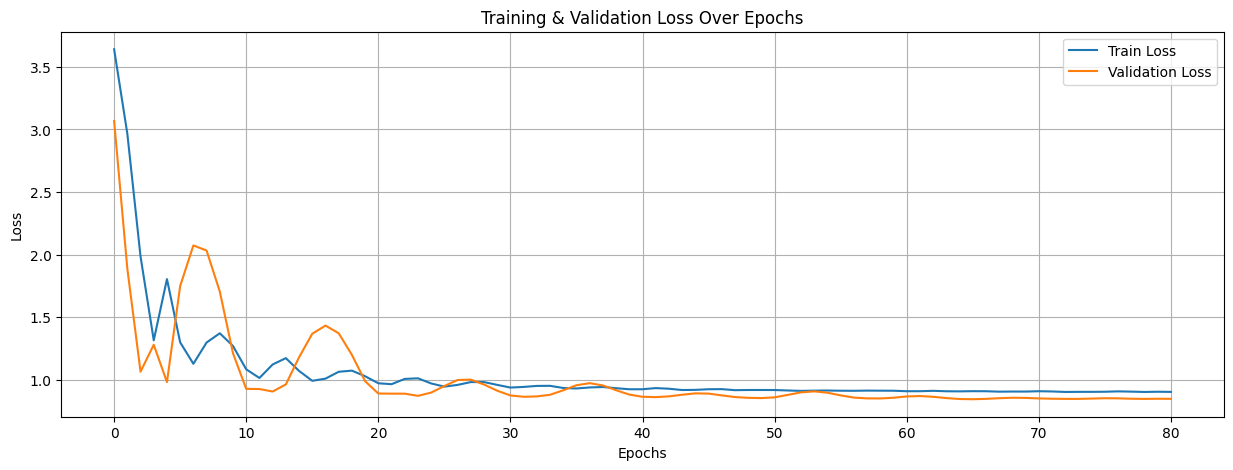

In [64]:
plt.figure(figsize=(15, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss Over Epochs")
plt.grid(True)
plt.show()

In [65]:
# Evaluate the model
hybrid_recommend_model_mlp.eval()
with torch.no_grad():
    test_outputs = hybrid_recommend_model_mlp(X_test)
    test_loss = criterion(test_outputs, y_test)

print(f"Final Test Loss: {test_loss.item():.4f}")

Final Test Loss: 0.8225


### Function for the predictions
Combines predictions from SVD, content similarity, and the neural network.

In [66]:
def hybrid_recommend(user_id, movie_id):
    """Predict the rating for a given user and movie using the hybrid model."""
    svd_pred = svd_model.predict(user_id, movie_id).est

    movie_idx = movies[movies["movie_id"] == movie_id].index[0]
    similar_movies = np.argsort(content_similarity[movie_idx])[-3:]
    content_pred = np.mean([
        ratings[ratings["movieId"] == movies.iloc[i]["movie_id"]]["rating"].mean()
        for i in similar_movies
    ])

    # Run into NN
    input_tensor = torch.tensor([[svd_pred, content_pred]], dtype=torch.float32).to(device)
    predicted_rating = hybrid_recommend_model_mlp(input_tensor).item()
    return predicted_rating

### Get Top-N Recommendations with NN
Predicts and ranks user-specific recommendations using the NN-based hybrid model.

In [67]:
def get_top_n_recommendations(user_id, n=5):
    """Get top-N movie recommendations for a given user, including predicted scores."""

    # Find unseen movies for the user
    unseen_movies = set(movies["movie_id"]) - set(ratings[ratings["userId"] == user_id]["movieId"])
    print(f"{len(unseen_movies)} from {len(set(movies.movie_id))} unseen movies")

    # Predict ratings for all unseen movies
    predictions = [(movie_id, hybrid_recommend(user_id, movie_id)) for movie_id in unseen_movies]

    # Sort by predicted score (descending) and take top-N
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

    return recommendations  # Now returns a list of (movie_id, predicted_rating)

In [68]:
test_user = 10
recommendations = get_top_n_recommendations(user_id=test_user, n=20)
print(f"\nHybrid recommendations for user {test_user}:")
for movie_id, score in top_movies:
    movie_title = movies[movies["movie_id"] == int(movie_id)]["movie_title"].values[0]
    print(f"{movie_title} with score: {score:.3f}")
    # print(f"Movie ID: {movie_id}, Predicted Rating: {score:.2f}")

1498 from 1682 unseen movies

Hybrid recommendations for user 10:
Close Shave, A (1995) with score: 4.640
Wrong Trousers, The (1993) with score: 4.589
Casablanca (1942) with score: 4.578
Schindler's List (1993) with score: 4.564
Shawshank Redemption, The (1994) with score: 4.560
Wallace & Gromit: The Best of Aardman Animation (1996) with score: 4.515
Usual Suspects, The (1995) with score: 4.450
Rear Window (1954) with score: 4.446
North by Northwest (1959) with score: 4.434
To Kill a Mockingbird (1962) with score: 4.421
Third Man, The (1949) with score: 4.412
One Flew Over the Cuckoo's Nest (1975) with score: 4.403
Manchurian Candidate, The (1962) with score: 4.395
Boot, Das (1981) with score: 4.389
Silence of the Lambs, The (1991) with score: 4.388
Good Will Hunting (1997) with score: 4.385
Shall We Dance? (1996) with score: 4.384
12 Angry Men (1957) with score: 4.382
Some Folks Call It a Sling Blade (1993) with score: 4.368
Vertigo (1958) with score: 4.352


## ML Flow
Integrates MLflow for experiment tracking, parameter logging, and model management. It captures hyperparameters, metrics (e.g., validation/test losses), and the trained NN model for reproducibility. This is useful for versioning and managing experiments efficiently.


In [69]:
import mlflow

In [73]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [76]:
mlflow.set_experiment("Hybrid Recommender Experiment")

with mlflow.start_run():
    # Log hyperparameters
    mlflow.log_param("learning_rate", 0.01)
    mlflow.log_param("dropout_rate", 0.2)

    # Log model architecture
    mlflow.log_param("num_hidden_layers", 4)  # If your model has 4 hidden layers
    mlflow.log_param("hidden_layer_sizes", [64, 128, 64, 32])  # Example structure
    mlflow.log_param("activation_function", "ReLU")  # If using ReLU
    mlflow.log_param("batch_norm", True)  # If using BatchNorm1d

    # Log final loss metrics
    mlflow.log_metric("val_loss", val_loss.item())
    mlflow.log_metric("test_loss", test_loss.item())

    # Save model
    mlflow.pytorch.log_model(pytorch_model=hybrid_recommend_model_mlp, registered_model_name="hybrid_recommend_model_mlp_v1", artifact_path="models")

    print("Model logged in MLflow!")

/Users/olegstorozhev/miniconda3/envs/recommendation_systems/lib/python3.8/site-packages/_distutils_hack/__init__.py:16: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/olegstorozhev/miniconda3/envs/recommendation_systems/lib/python3.8/site-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Successfully registered model 'hybrid_recommend_model_mlp_v1'.
2025

Model logged in MLflow!
